In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

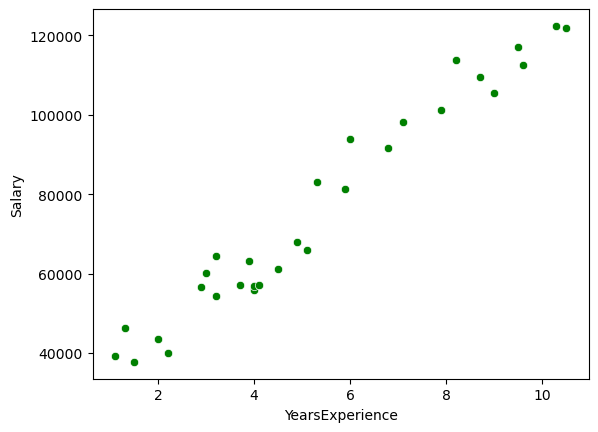

In [5]:
sns.scatterplot(x=df.YearsExperience, y=df.Salary, color="Green")

In [6]:
X = df.drop('Salary', axis = 1)
y = df.Salary

In [7]:
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=10)

In [8]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred_test = model.predict(X_test)

In [11]:
r2_score(y_pred_test,y_test)

0.9772735206341413

In [12]:
model.score(X_test,y_test)

0.9816423482070253

In [13]:
model.coef_

array([9356.86299354])

In [14]:
model.intercept_

26089.096632416702

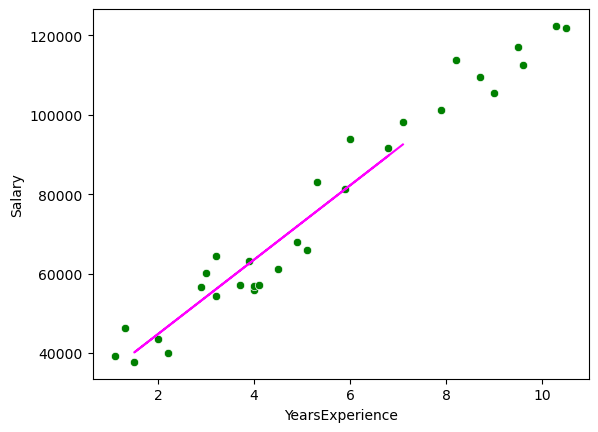

In [15]:
sns.scatterplot(x=df.YearsExperience, y=df.Salary, color="Green")
plt.plot(X_test, model.predict(X_test), color="Magenta")
plt.show()

In [16]:
from statsmodels.formula.api import ols

In [18]:
linear_model =ols("y~X", data= df).fit()

In [45]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        14:55:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
df1={"test_exp":X_test.to_numpy()[0:,0], "Act_salary":y_test.to_numpy(), "Predicted_salary":y_pred_test}
df1=pd.DataFrame(df1)
df1

,test_exp,Act_salary,Predicted_salary
0,6.8,91738.0,89715.764988
1,3.2,54445.0,56031.058212
2,2.9,56642.0,53223.999314
3,1.5,37731.0,40124.391123
4,2.0,43525.0,44802.822619
5,7.1,98273.0,92522.823887


In [86]:
df1.to_csv("pred_salary.csv")